# <center> EDA on CUISINE RATING DATASET

#### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("./Cuisine_rating.csv")
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


#### Descriptive statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Area code,200.0,141.060,26.130257,101.0,123.00,135.0,158.00,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.00,1987.0,2000.00,2009.0
Budget,200.0,3.815,1.056578,1.0,3.00,4.0,5.00,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.00,3.0,5.00,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.00,3.0,5.00,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.50,3.0,4.00,5.0


#### Null values in percentage

In [5]:
df.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

There are no null values in the given dataset

Looking for duplicated values

In [6]:
df.duplicated().sum()

0

There are no duplicate values

In [7]:
df.shape

(200, 15)

In [8]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

#### Renaming the columns

In [9]:
df.rename(columns={'Marital Status':'Marital_Status','Alcohol ':'Alcohol','Food Rating':'Food_Rating','Service Rating':'Service_Rating','Overall Rating':'Overall_Rating', 'Often A S':'Often_A_S'},inplace=True)

#### Feature Engineering

In [10]:
df['Age']=[(2022-YOB)  for YOB in df['YOB']]

#### Dropping unwanted columns

In [11]:
df.drop(columns=['User ID','Area code','YOB'],inplace=True)

#### Average rating of cuisine using groupby

In [12]:
average_rating_of_cuisines=df.groupby(['Cuisines'])['Overall_Rating'].mean()
average_rating_of_cuisines

Cuisines
Chinese     3.270833
Filipino    3.044118
French      3.102941
Indian      3.171875
Italian     3.194444
Japanese    3.597222
Seafood     3.136364
Name: Overall_Rating, dtype: float64

### Graphical EDA

### Univariate Analysis

#### Histplot

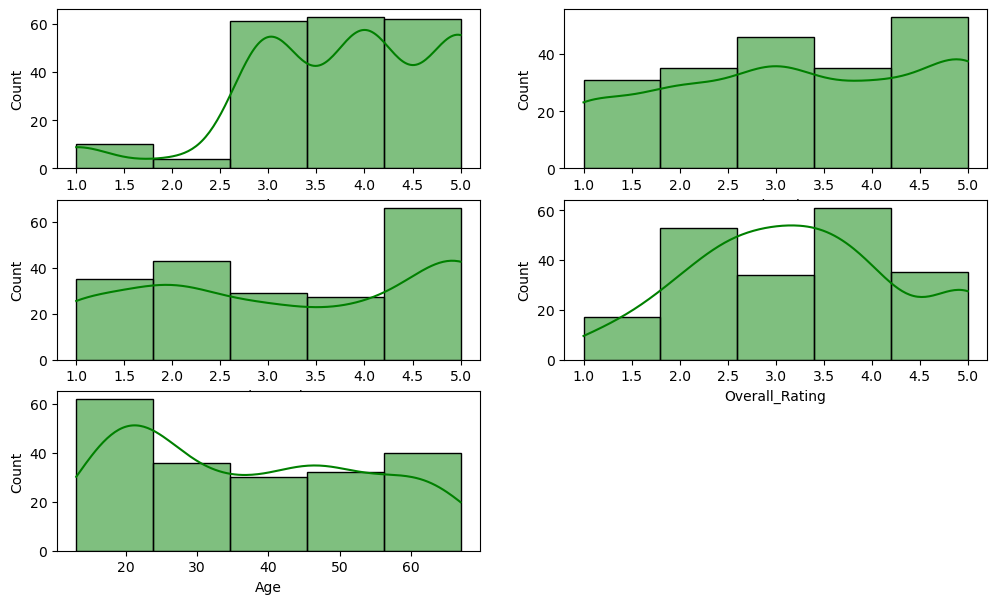

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(5,2,1)
sns.histplot(data=df, x='Budget',bins=5, kde=True,color='green')

plt.subplot(5,2,2)
sns.histplot(data=df, x='Food_Rating',bins=5, kde=True,color='green')

plt.subplot(5,2,3)
sns.histplot(data=df, x='Service_Rating',bins=5, kde=True,color='green')

plt.subplot(5,2,4)
sns.histplot(data=df, x='Overall_Rating',bins=5, kde=True,color='green')

plt.subplot(5,2,5)
sns.histplot(data=df, x='Age',bins=5, kde=True,color='green')

plt.show()

#### Boxplot

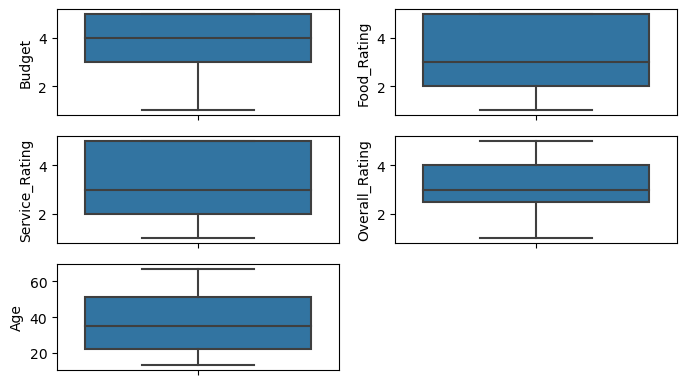

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(5,2,1)
sns.boxplot(data=df, y='Budget')

plt.subplot(5,2,2)
sns.boxplot(data=df, y='Food_Rating')

plt.subplot(5,2,3)
sns.boxplot(data=df, y='Service_Rating')

plt.subplot(5,2,4)
sns.boxplot(data=df, y='Overall_Rating')

plt.subplot(5,2,5)
sns.boxplot(data=df, y='Age')

plt.show()

##### We used boxplot to detect the outlier in the dataset. Here there are no outliers.

### Multivariate Analysis

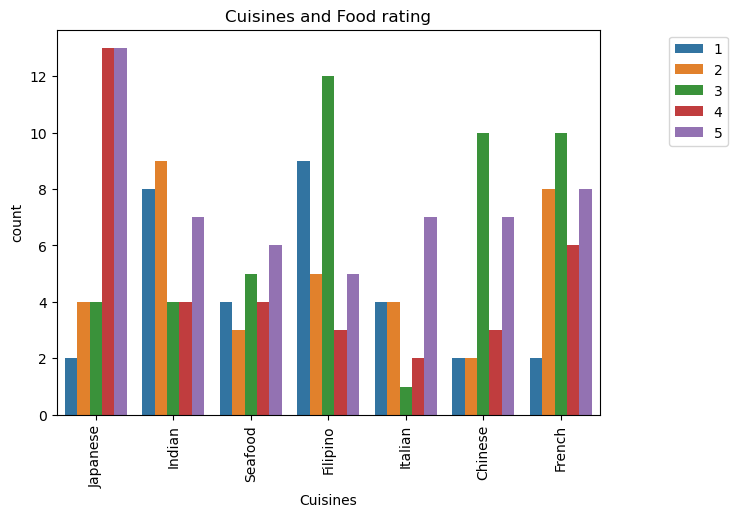

In [15]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x='Cuisines',hue='Food_Rating')
plt.title("Cuisines and Food rating")
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

##### From this countplot we can see more than 12 people rated 4 and 5 for Japanese Cuisine in food rating.

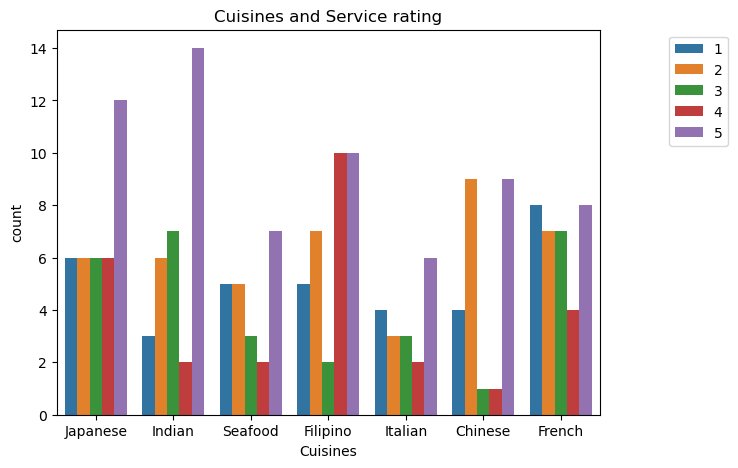

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Cuisines',hue='Service_Rating')
plt.title("Cuisines and Service rating")
plt.legend(bbox_to_anchor = (1.25,1))
plt.show()

##### Indian cuisine restaurants provided good service to the customers.

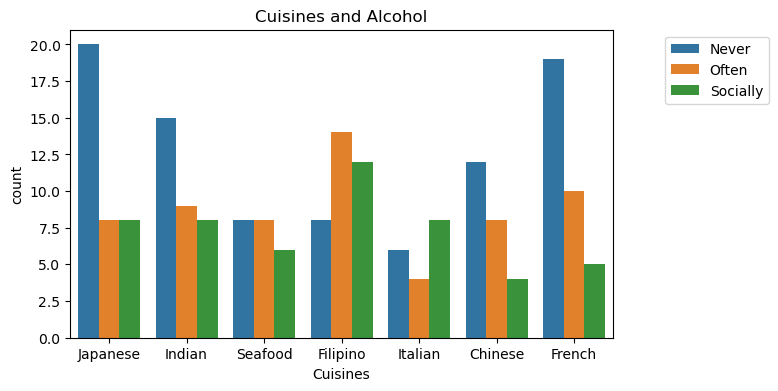

In [17]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Cuisines',hue='Alcohol')
plt.title("Cuisines and Alcohol")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

#####  Customers who don't drink Alcohol prefers Japanese  while often and socially  drinking customers prefers Filipino Cuisines.

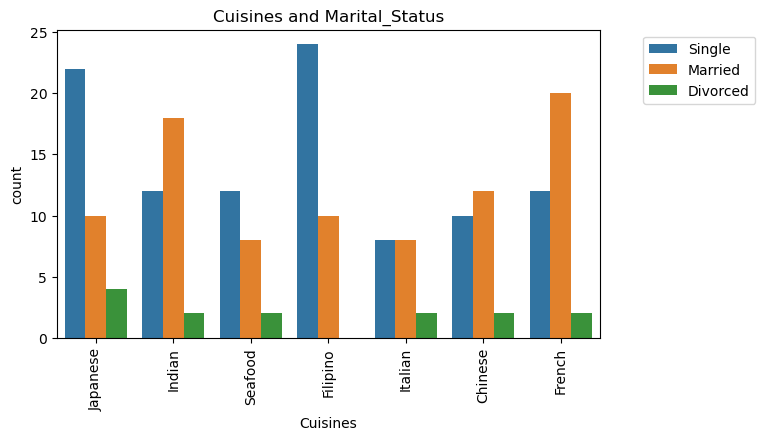

In [18]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='Cuisines',hue='Marital_Status')
plt.title("Cuisines and Marital_Status")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

##### Single customers preferred Filipino cuisine over Japanese while married customers prefer French.

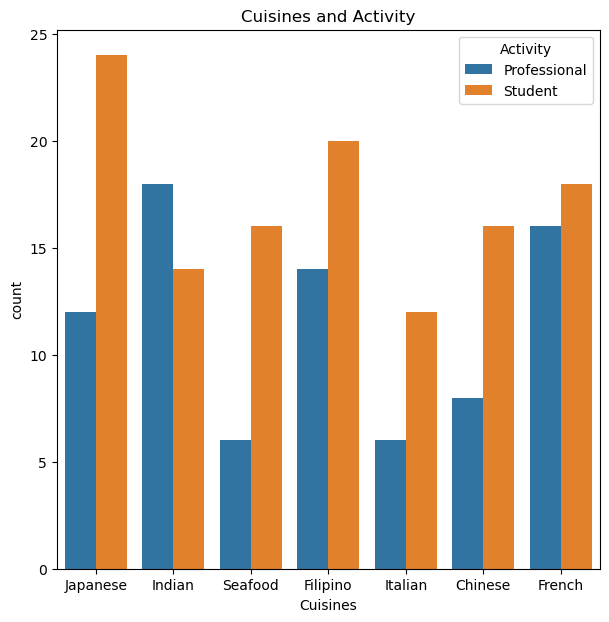

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='Cuisines',hue='Activity')
plt.title("Cuisines and Activity")
plt.show()

##### Students prefer Japanese Cuisine whereas Professionals prefer Indian.

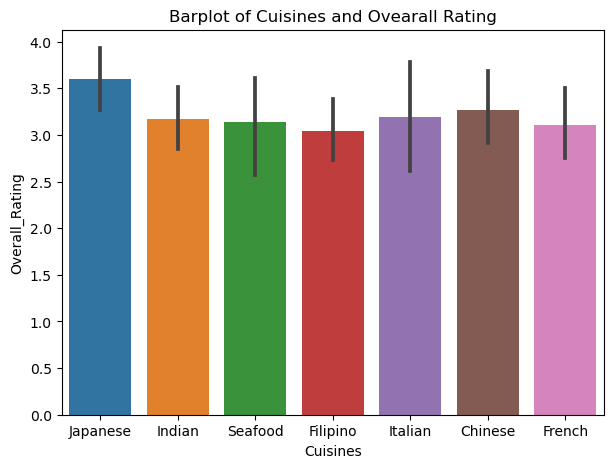

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x=df['Cuisines'],y='Overall_Rating')
plt.title("Barplot of Cuisines and Ovearall Rating")
plt.show()

##### This graph shows average rating of each cuisine.Here Japanese cuisine had the highest and Filipino cuisine had the lowest average ovearall rating.

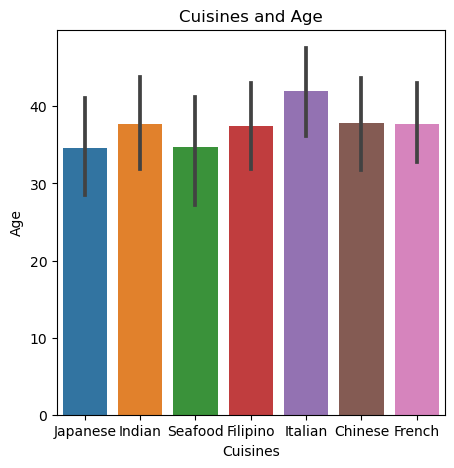

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x=df['Cuisines'],y='Age')
plt.title("Cuisines and Age")
plt.show()

##### This plot depicts the average age of each cuisine consumers.

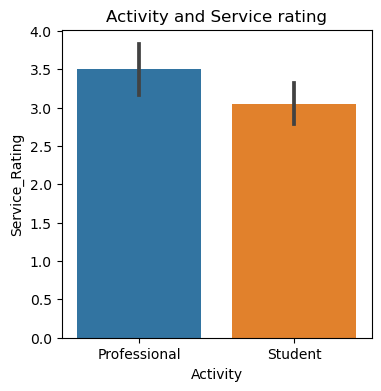

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x=df['Activity'],y='Service_Rating')
plt.title("Activity and Service rating")
plt.show()

##### Average Service Rating provided by Students is 3 where by Professionals is around 3.5.

In [23]:
df.Often_A_S.value_counts().index

Index(['No', 'Yes'], dtype='object')

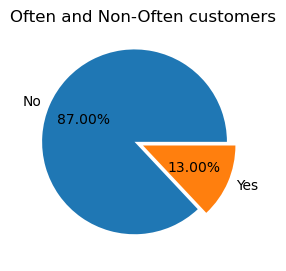

In [24]:
plt.figure(figsize=(3,3))
plt.pie(data=df,x=df.Often_A_S.value_counts(),labels=['No', 'Yes'],\
       explode=[0.1,0],autopct='%1.2f%%')
plt.title("Often and Non-Often customers")
plt.show()

##### Around 87% of the customers are non often customers.

In [25]:
df.Location.value_counts()

St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: Location, dtype: int64

#### Creating new DataFrame based on Location

In [26]:
def sort_location(location):
    df_location=df[df['Location']==location]
    df_location.drop(columns='Location',inplace=True)
    return df_location

In [27]:
St_George_NY=sort_location('St. George,NY')
St_George_NY

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


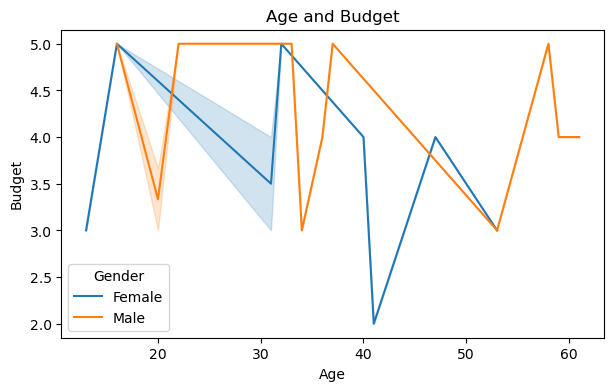

In [28]:
plt.figure(figsize=(7,4))
sns.lineplot(data=St_George_NY,x= 'Age',y='Budget',hue='Gender')
plt.title("Age and Budget")
plt.show()

##### Here we can see that only males maintain a stability in the budget during the age of 20-30 in St. George,NY location.

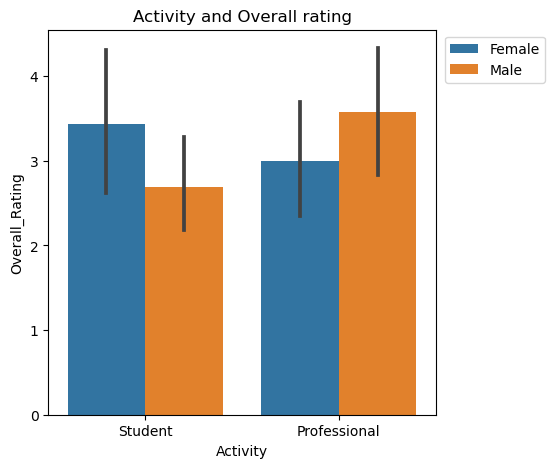

In [29]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=0)
sns.barplot(data=St_George_NY,x= 'Activity',y='Overall_Rating',hue='Gender')
plt.title("Activity and Overall rating")
plt.legend(bbox_to_anchor=[1.3,1])
plt.show()

##### In St. George,NY location female students rated higher than male Students. While male Professionals rated higher than female Professionals.

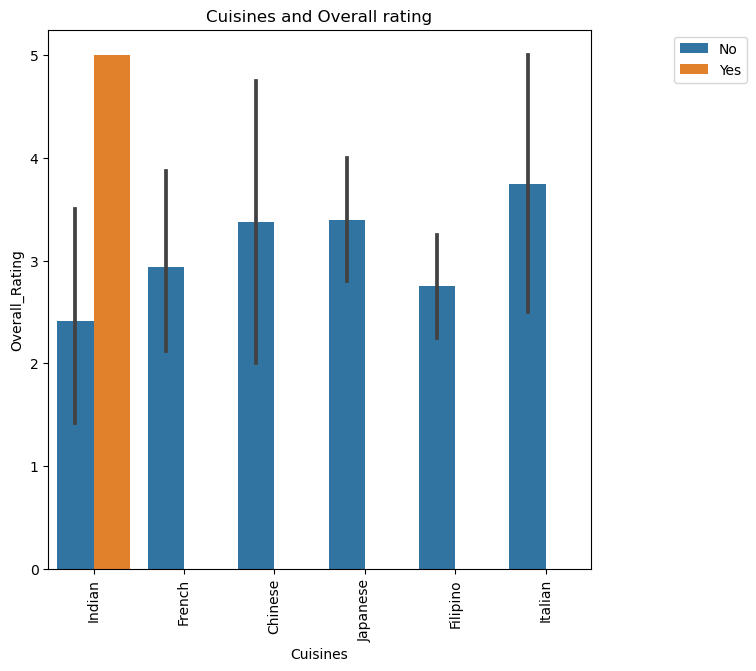

In [30]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.barplot(data=St_George_NY, x='Cuisines', y='Overall_Rating',hue='Often_A_S')
plt.title("Cuisines and Overall rating")
plt.legend(bbox_to_anchor=[1.3,1])
plt.show()

##### In St_George_NY usual customers rated 5 in overall rating for indian cuisine.

#### Value counts of Cuisines in St_George_NY

In [31]:
St_George_NY_CUISINES_Value_counts=St_George_NY.Cuisines.value_counts().index
St_George_NY_CUISINES_Value_counts

Index(['Filipino', 'Japanese', 'Indian', 'French', 'Chinese', 'Italian'], dtype='object')

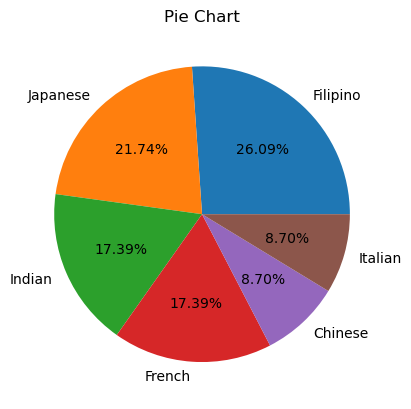

In [32]:
plt.pie(data=St_George_NY,x=St_George_NY.Cuisines.value_counts(),labels=['Filipino', 'Japanese', 'Indian', 'French', 'Chinese', 'Italian'],\
       autopct='%1.2f%%')
plt.title("Pie Chart")
plt.show()

##### In St_George_NY  Filipino is the most favourite and Italian and Chinese are the two leat favourable Cuisines.

#### Sorting data of St_George_NY location using their Age

In [33]:
St_George_NY_sort_age=St_George_NY.sort_values(by='Age',ascending=True)
St_George_NY_sort_age

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
120,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
171,Male,Single,Student,5,Filipino,Socially,Never,1,2,1.5,No,16
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
112,Female,Single,Professional,5,Chinese,Socially,Never,5,4,4.5,No,16
197,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
97,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
71,Male,Single,Student,5,Filipino,Socially,Never,1,2,1.5,No,16
98,Male,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,20
174,Male,Single,Student,3,Filipino,Never,Never,3,4,3.5,No,20


#### Finding customers below Age 25 in St_George_NY location

In [34]:
customers_below_25_in_St_George_NY=St_George_NY_sort_age.query("Age<25")
customers_below_25_in_St_George_NY

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
120,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
171,Male,Single,Student,5,Filipino,Socially,Never,1,2,1.5,No,16
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
112,Female,Single,Professional,5,Chinese,Socially,Never,5,4,4.5,No,16
197,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
97,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
71,Male,Single,Student,5,Filipino,Socially,Never,1,2,1.5,No,16
98,Male,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,20
174,Male,Single,Student,3,Filipino,Never,Never,3,4,3.5,No,20


In [35]:
customers_below_25_in_St_George_NY.Cuisines.value_counts().index

Index(['Filipino', 'Japanese', 'Indian', 'Chinese', 'French'], dtype='object')

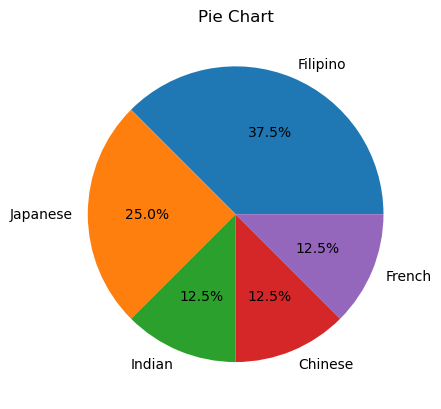

In [36]:
plt.pie(data=customers_below_25_in_St_George_NY,x=customers_below_25_in_St_George_NY.Cuisines.value_counts(),\
        labels=['Filipino', 'Japanese', 'Indian', 'Chinese', 'French'],\
       autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

##### Customers below age 25 in St_George_NY, prefer Filipino cuisine the most.

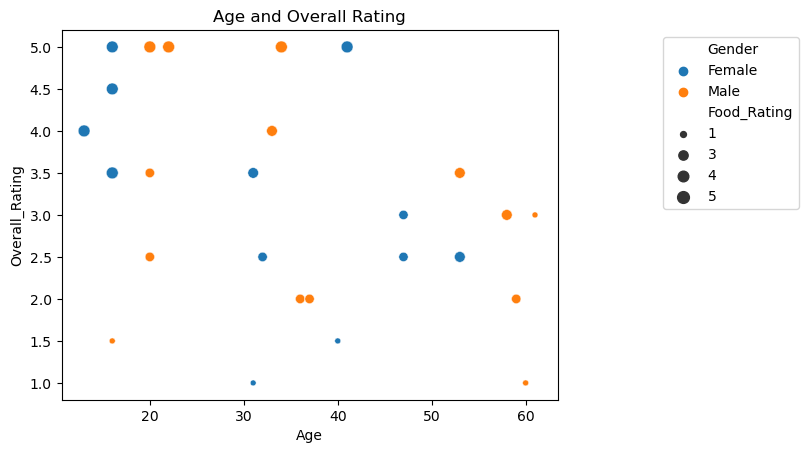

In [37]:
sns.scatterplot(data=St_George_NY,x='Age',y='Overall_Rating',size='Food_Rating',hue='Gender')
plt.legend(bbox_to_anchor = (1.5,1))
plt.title("Age and Overall Rating")
plt.show()

##### In St_George_NY, males gave higher Food Rating than females.

#### Heatmap

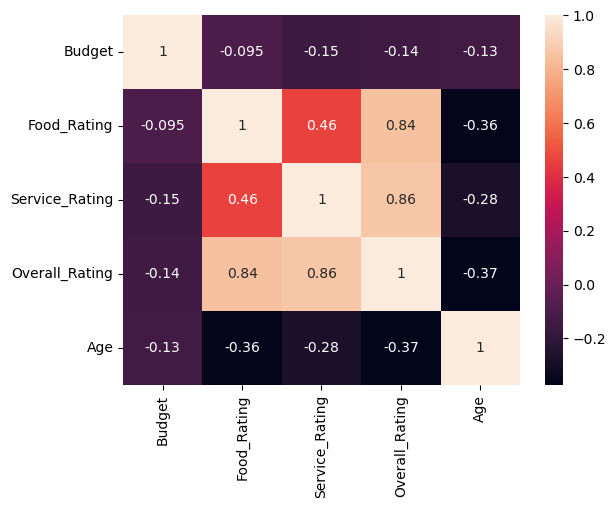

In [38]:
sns.heatmap(St_George_NY.corr(),annot=True)
plt.show()

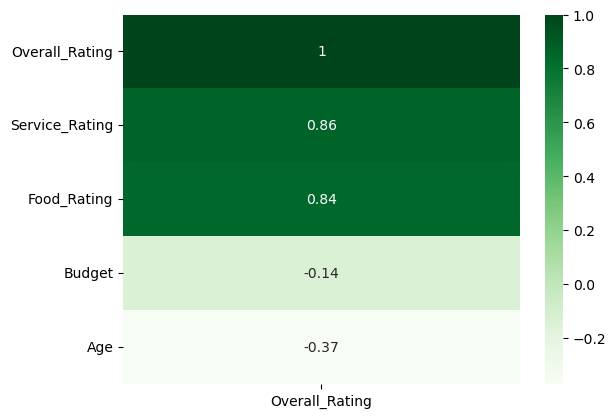

In [39]:
sns.heatmap(St_George_NY.corr()[['Overall_Rating']].sort_values(by='Overall_Rating',ascending=False),annot=True,cmap='Greens')
plt.show()

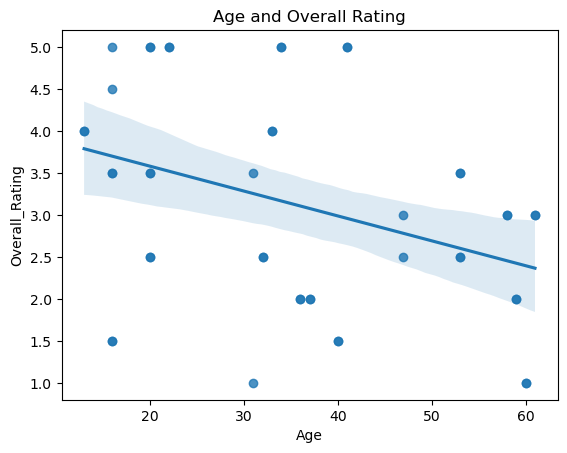

In [40]:
sns.regplot(data=St_George_NY,x='Age',y='Overall_Rating')
plt.title("Age and Overall Rating")
plt.show()

##### Here we can see that Age and Overall Rating are neagtively correlated in St_George_NY.

<Figure size 700x300 with 0 Axes>

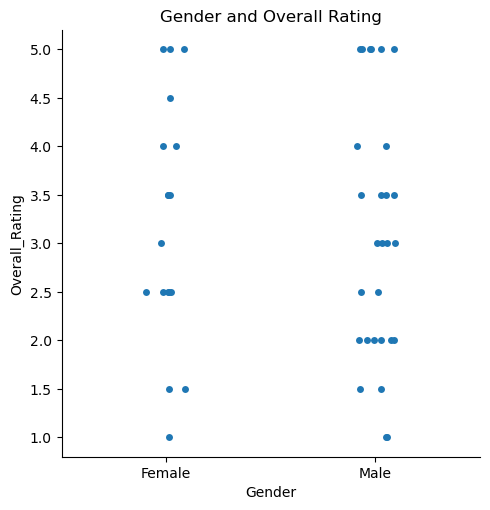

In [41]:
plt.figure(figsize=(7,3))
sns.catplot(data=St_George_NY,x='Gender',y='Overall_Rating')
plt.title("Gender and Overall Rating")
plt.show()

##### From this graph we can see that Males gave Overall Ratings more than  Females. Most of the Females give 2.5 as overall rating where Males give 5.

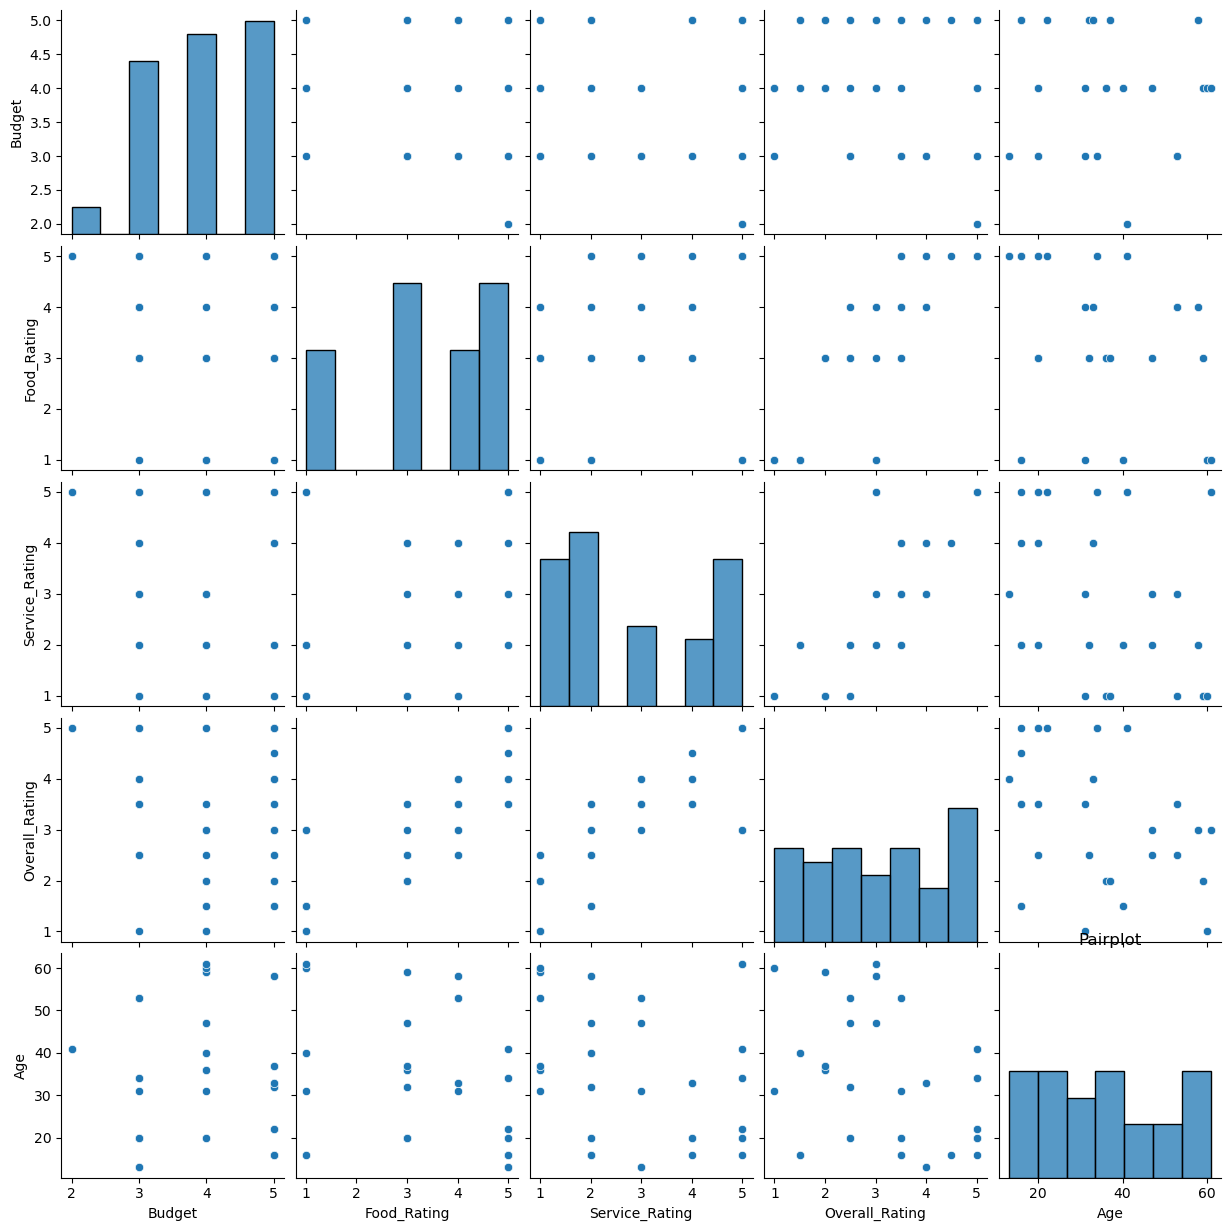

In [42]:
sns.pairplot(St_George_NY)
plt.title("Pairplot")
plt.show()

#### Japanese Cuisine customers in St. George,NY location

In [43]:
Japanese_cuisine_St_George_NY=St_George_NY.query("Cuisines=='Japanese'")
Japanese_cuisine_St_George_NY

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
58,Male,Single,Student,5,Japanese,Never,Socially,4,2,3.0,No,58
62,Male,Single,Student,4,Japanese,Never,Often,5,5,5.0,No,20
97,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
125,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
142,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
158,Male,Single,Student,5,Japanese,Never,Socially,4,2,3.0,No,58
162,Male,Single,Student,4,Japanese,Never,Often,5,5,5.0,No,20
197,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16


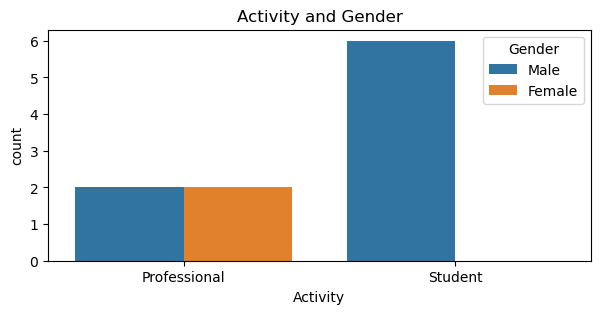

In [44]:
plt.figure(figsize=(7,3))
sns.countplot(data=Japanese_cuisine_St_George_NY, x='Activity',hue='Gender')
plt.title("Activity and Gender")
plt.show()

##### Male students in St. George NY like Japanese cuisine more than professionals.

#### Soting data based on indian cuisines

In [45]:
def sort_cuisines(cuisines):
    df_cuisines=df[df['Cuisines']=='Indian']
    df_cuisines.drop(columns=['Cuisines'],inplace=True)
    return df_cuisines

In [46]:
indian_cuisine=sort_cuisines('Indian')
indian_cuisine

,Location,Gender,Marital_Status,Activity,Budget,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
1,"St. George,NY",Female,Married,Student,3,Never,Socially,1,1,1.0,No,31
6,"China Town, NY",Female,Married,Professional,5,Often,Socially,1,4,2.5,No,45
20,"St. George,NY",Female,Single,Student,3,Socially,Often,5,3,4.0,No,13
24,"Central Park,ny",Male,Single,Professional,3,Socially,Socially,2,5,3.5,No,59
26,"Central Park,NY",Female,Single,Student,3,Never,Socially,2,3,2.5,No,21
27,"China Town, NY",Male,Single,Student,5,Never,Never,1,5,3.0,No,22
31,"Market City, MY",Male,Married,Student,1,Never,Often,4,2,3.0,No,51
32,"Upper West Side,NY",Male,Single,Professional,3,Often,Never,3,2,2.5,No,27
33,"Central Park,ny",Female,Single,Professional,5,Socially,Socially,1,5,3.0,No,13
67,"Market City, NY",Male,Married,Professional,3,Never,Often,5,2,3.5,No,22


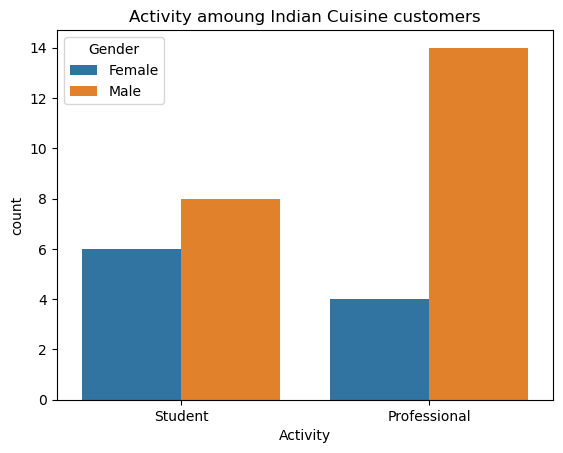

In [47]:
sns.countplot(data=indian_cuisine,x='Activity',hue='Gender')
plt.title("Activity amoung Indian Cuisine customers")
plt.show()

###### From this plot we can see that Indian cuisines are preffered by Professionals.

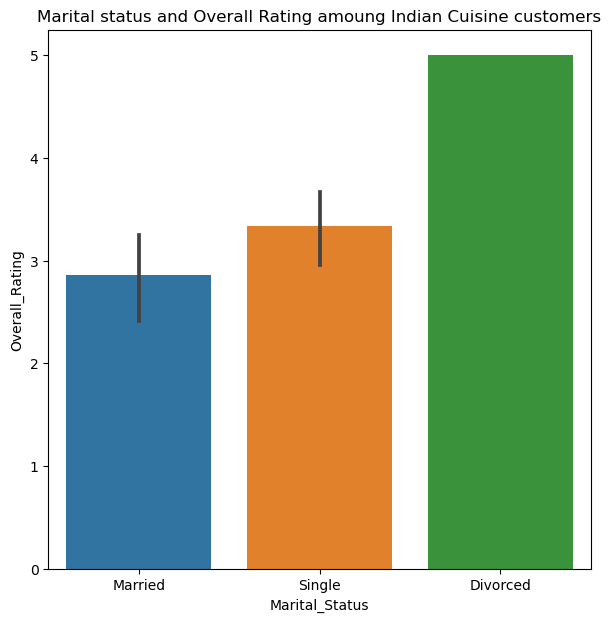

In [48]:
plt.figure(figsize=(7,7))
sns.barplot(data=indian_cuisine,x=indian_cuisine['Marital_Status'],y='Overall_Rating')
plt.title("Marital status and Overall Rating amoung Indian Cuisine customers")
plt.show()

##### Most of the Indian cuisine customers are Divorced.

#### Data of Often smoking customers of Indian cuisine

In [49]:
often_smokers_indian_cuisine=indian_cuisine.query("Smoker=='Often'")
often_smokers_indian_cuisine

,Location,Gender,Marital_Status,Activity,Budget,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
20,"St. George,NY",Female,Single,Student,3,Socially,Often,5,3,4.0,No,13
31,"Market City, MY",Male,Married,Student,1,Never,Often,4,2,3.0,No,51
67,"Market City, NY",Male,Married,Professional,3,Never,Often,5,2,3.5,No,22
89,"St. George,NY",Male,Divorced,Professional,3,Often,Often,5,5,5.0,Yes,34
94,"China Town, NY",Male,Married,Student,3,Often,Often,2,5,3.5,Yes,48
120,"St. George,NY",Female,Single,Student,3,Socially,Often,5,3,4.0,No,13
131,"Market City, MY",Male,Married,Student,1,Never,Often,4,2,3.0,No,51
167,"Market City, NY",Male,Married,Professional,3,Never,Often,5,2,3.5,No,22
189,"St. George,NY",Male,Divorced,Professional,3,Often,Often,5,5,5.0,Yes,34
194,"China Town, NY",Male,Married,Student,3,Often,Often,2,5,3.5,Yes,48


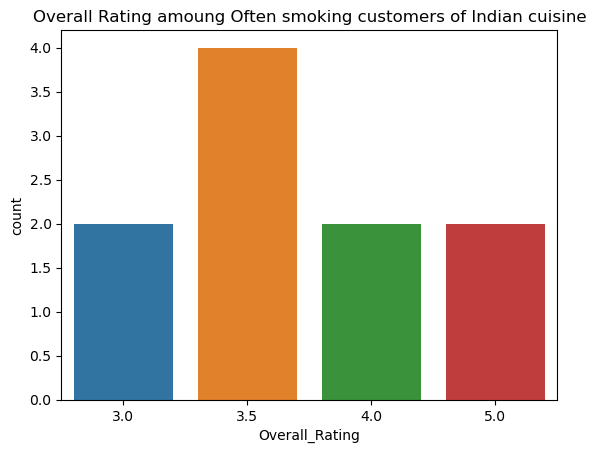

In [50]:
sns.countplot(data=often_smokers_indian_cuisine,x='Overall_Rating')
plt.title("Overall Rating amoung Often smoking customers of Indian cuisine")
plt.show()

##### 3.5 is the average Overall Rating amoung Often smoking customers of Indian cuisine

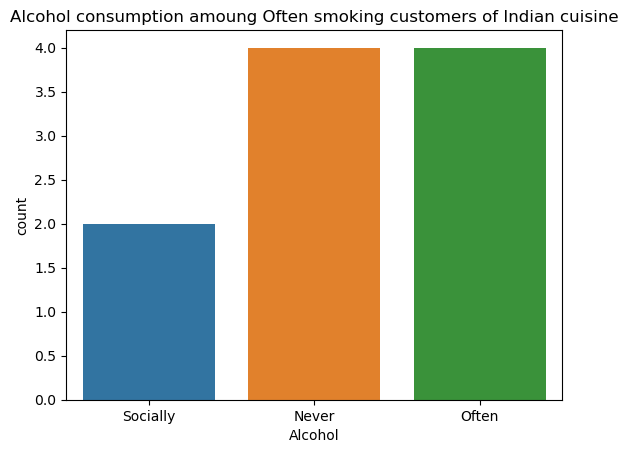

In [51]:
sns.countplot(data=often_smokers_indian_cuisine,x='Alcohol')
plt.title("Alcohol consumption amoung Often smoking customers of Indian cuisine")
plt.show()

##### Not consuming or often consuming customers are high in number than socially drinking customers amoung Often smoking customers of Indian cuisine.

In [52]:
location_where_filipino_cuisine_is_popular=df.query("Cuisines=='Filipino' and Alcohol=='Often'")

In [53]:
location_where_filipino_cuisine_is_popular

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
14,"Riverdale,NY",Male,Married,Student,3,Filipino,Often,Never,1,1,1.0,No,66
41,"Market City, NY",Female,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No,55
55,"Upper West Side,NY",Female,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,No,31
79,"China Town, NY",Female,Single,Student,1,Filipino,Often,Socially,1,5,3.0,No,24
86,"St. George,NY",Male,Married,Professional,4,Filipino,Often,Socially,1,5,3.0,No,61
93,"Riverdale,NY",Female,Married,Student,5,Filipino,Often,Never,1,4,2.5,No,37
107,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,4,2,3.0,Yes,19
114,"Riverdale,NY",Male,Married,Student,3,Filipino,Often,Never,2,2,2.0,No,66
141,"Market City, NY",Female,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No,55


In [54]:
location_where_filipino_cuisine_is_popular.shape

(14, 13)

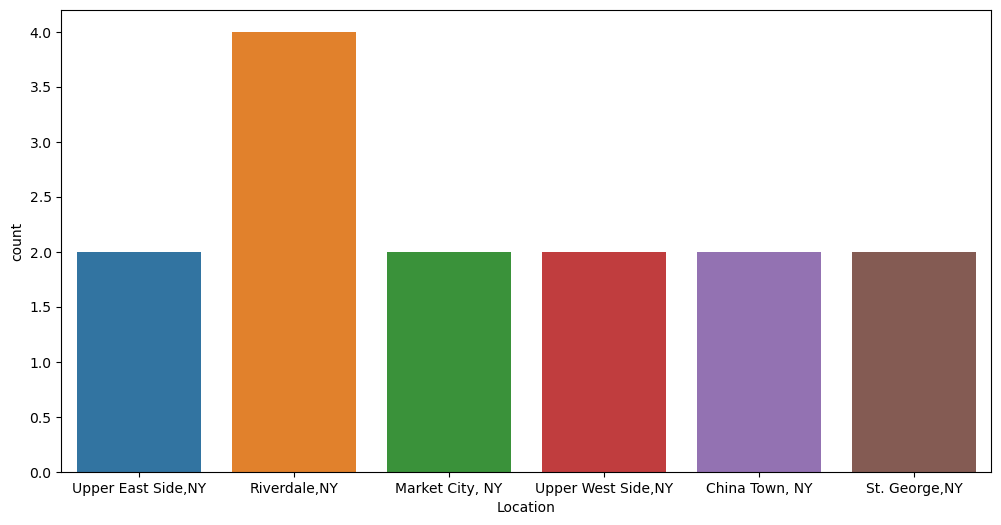

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=location_where_filipino_cuisine_is_popular,x='Location')
plt.show()

##### Location where Filipino cuisine is popular and alcohol consumption is high was Riverdale.

In [56]:
drunkards_df = df[df.Alcohol != 'Never']
drunkards_df

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,"Riverdale,NY",Male,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,"Upper West Side,NY",Female,Married,Professional,4,French,Often,Often,5,5,5.0,Yes,19
189,"St. George,NY",Male,Divorced,Professional,3,Indian,Often,Often,5,5,5.0,Yes,34
190,"Cedar Hill, NY",Male,Married,Professional,4,Indian,Socially,Socially,2,5,3.5,No,62
193,"Riverdale,NY",Female,Married,Student,5,Filipino,Often,Never,1,4,2.5,No,37


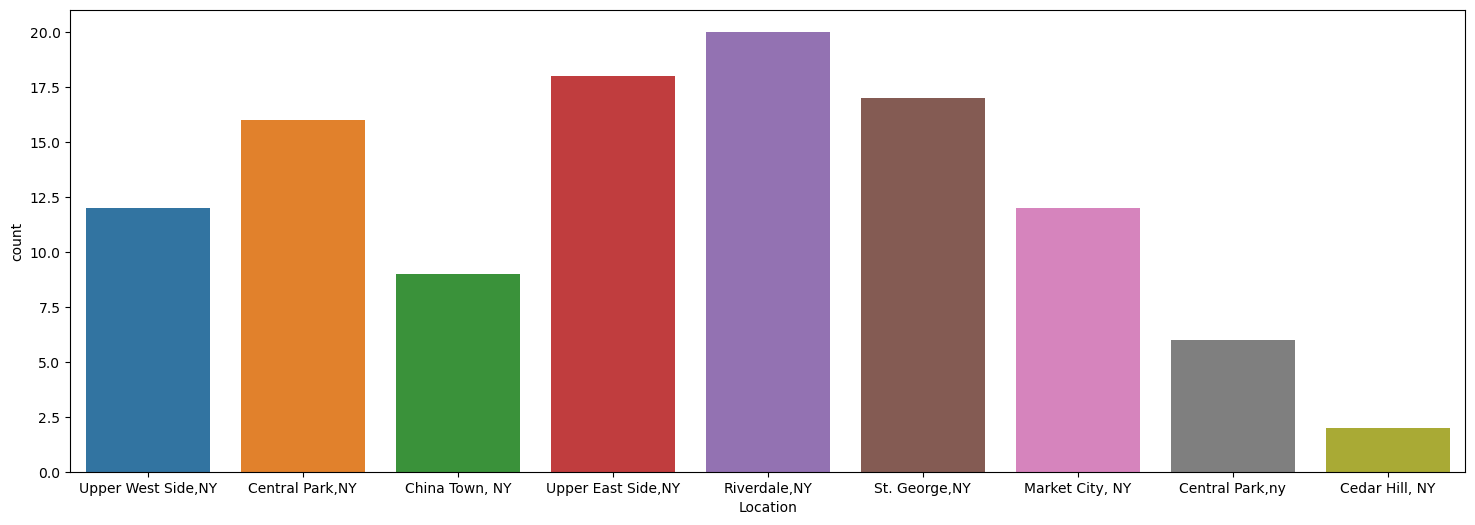

In [57]:
plt.figure(figsize=(18,6))
sns.countplot(data=drunkards_df,x='Location')
plt.show()

##### Alcohol consumption is high in Riverdale, NY